# This is a baseline code to design the THX Deep Note

In [132]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

## Parameters

In [133]:
fs = 44100

num_voices = 30

# note evolution stage
intial_stage = 5  # sec
converge_stage = 6 # sec
target_stage = 3 # sec
decay_stage = 2 # sec

intial_stage_len = int(intial_stage*fs)
converge_stage_len = int(converge_stage*fs)
target_stage_len = int(target_stage*fs)
decay_stage_len = int(decay_stage*fs)
total_len = intial_stage_len + converge_stage_len + target_stage_len + decay_stage_len


# pitch curve parameters
rand_freq_min = 200
rand_freq_max = 400

init_freq = rand_freq_min + (rand_freq_max-rand_freq_min)*np.random.rand(num_voices)

# D major  : D1,   D2, D3,  D4,  D5,  A5,  D6,   F#6,  A6
last_freq = [37.5, 75, 150, 300, 600, 900, 1200, 1500, 1800, \
             37.5, 75, 150, 300, 600, 900, 1200, 1500, 1800, \
             37.5, 75, 150, 300, 600, 900, 1200, 1800, \
             150, 300, 900, 1200]

# amp envelope parameters
intial_stage_level = 0.25
target_stage_level = 1
fade_in_dur = 0.5 # sec



## Pitch Curves 

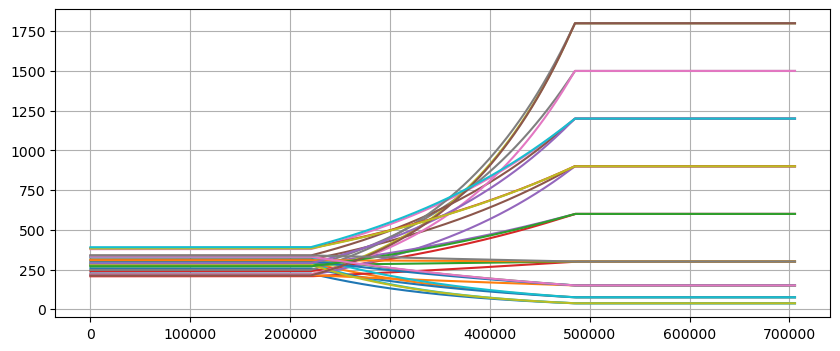

In [134]:
freq = np.zeros((num_voices, total_len))

for i in range(num_voices):
    
    # initial stage
    offset = 0
    freq[i,offset:offset+intial_stage_len] = init_freq[i]

    # convergence stage    
    offset += intial_stage_len    
    freq[i,offset:offset+converge_stage_len] = np.logspace(np.log2(init_freq[i]), np.log2(last_freq[i]), converge_stage_len, base=2)
     
    # target stage
    offset += converge_stage_len            
    freq[i,offset:offset+converge_stage_len] = last_freq[i]

   # decay stage
    offset += target_stage_len    
    freq[i,offset:offset+decay_stage_len] = last_freq[i]

    
# Plot the pitch curves for verification          
plt.figure(figsize=(10, 4))
for i in range(num_voices):
    plt.plot(freq[i,:])    
plt.grid(True)


## Amp Envelopes

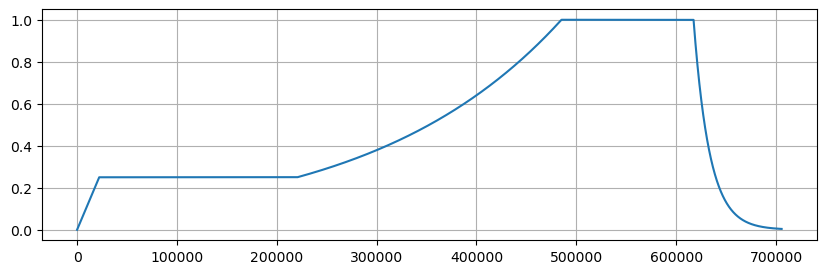

In [137]:
amp_env = np.zeros(total_len)

intial_stage_env1 = np.linspace(0,intial_stage_level,int(fade_in_dur*fs))
intial_stage_env2 = np.linspace(intial_stage_level,intial_stage_level,intial_stage_len-int(fade_in_dur*fs))
converge_stage_env = np.logspace(np.log10(intial_stage_level), np.log10(target_stage_level), converge_stage_len)
targe_stage_env = np.linspace(target_stage_level, target_stage_level, target_stage_len)
decay_stage_env = np.logspace(np.log10(target_stage_level), np.log10(0.00001), decay_stage_len, base=3)


amp_env = np.append(intial_stage_env1, intial_stage_env2)
amp_env = np.append(amp_env, converge_stage_env)
amp_env = np.append(amp_env, targe_stage_env)
amp_env = np.append(amp_env, decay_stage_env)


# Plot the pitch curves for verification      
plt.figure(figsize=(10, 3))
plt.plot(amp_env)    
plt.grid(True)



## Tone Generation 

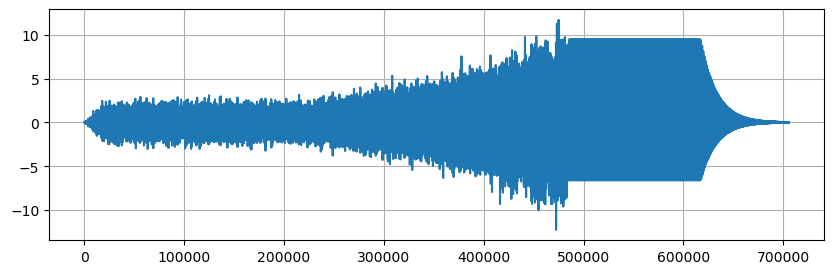

In [138]:
x_voice = np.zeros((num_voices, total_len))
x_deep_note = np.zeros(total_len)

phase = np.zeros(num_voices)

for i in range(num_voices):
    
    # sawtooth 
    phase = 0 
    for j in range(total_len):
        phase = phase + 2*freq[i,j]/fs
        
        if (phase > 1):
            phase = phase - 2
            
        x_voice[i,j] = phase
                
        
    x_deep_note += x_voice[i,:]    
        
x_deep_note = x_deep_note*amp_env
        
plt.figure(figsize=(10, 3))
plt.plot(x_deep_note)    
plt.grid(True)

ipd.Audio(x_deep_note, rate=fs)

